In [42]:
# Importar bibliotecas necesarias para la red neuronal
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU,Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv(r'C:\Users\DAVID\Desktop\MECANICA_ROCAS_FREEFEM\MODELO_PREDICCION_SOSTENIMIENTO\DATA\datos_red_neuronal.csv')
df.drop(["Tipo_Roca","Historial_Fallos","Tipo_Roca_encoded","Tipo_Sostenimiento_Previo"], axis=1, inplace=True)


In [36]:
df.head()

,Frecuencia_Chasquido_Hz,Amplitud_Chasquido_dB,Esfuerzo_Vertical_kPa,Esfuerzo_Horizontal_kPa,Profundidad,Humedad_Roca,Temperatura,Tipo_Fractura,Resistencia_Compresion,Modulo_Elasticidad,Angulo_Inclinacion,Tipo_Fractura_encoded,Tipo_Sostenimiento
0,81,1094,202.988114,191.978335,3404.907097,27.051243,42.509708,3,109.391091,47.862961,1.594654,0,2
1,94,1057,244.429964,179.512668,2413.348159,39.610543,36.859279,5,126.401728,40.894108,38.372802,1,1
2,89,956,216.453689,159.593836,3699.549942,25.978383,36.096670,5,102.188651,48.792798,42.320061,1,2
3,85,1026,215.729382,179.055312,3817.351558,20.143859,35.748489,5,106.346350,45.964006,1.180309,1,1
4,82,928,225.604429,175.299166,1561.078273,30.312799,38.740535,5,143.167647,44.703557,35.516782,1,2


In [37]:
columnas = df.columns.to_list()
columnas.pop(-1)
columnas

['Frecuencia_Chasquido_Hz',
 'Amplitud_Chasquido_dB',
 'Esfuerzo_Vertical_kPa',
 'Esfuerzo_Horizontal_kPa',
 'Profundidad',
 'Humedad_Roca',
 'Temperatura',
 'Tipo_Fractura',
 'Resistencia_Compresion',
 'Modulo_Elasticidad',
 'Angulo_Inclinacion',
 'Tipo_Fractura_encoded']

In [38]:

# Seleccionar las características de entrada (X)
X = df[columnas]
X


,Frecuencia_Chasquido_Hz,Amplitud_Chasquido_dB,Esfuerzo_Vertical_kPa,Esfuerzo_Horizontal_kPa,Profundidad,Humedad_Roca,Temperatura,Tipo_Fractura,Resistencia_Compresion,Modulo_Elasticidad,Angulo_Inclinacion,Tipo_Fractura_encoded
0,81,1094,202.988114,191.978335,3404.907097,27.051243,42.509708,3,109.391091,47.862961,1.594654,0
1,94,1057,244.429964,179.512668,2413.348159,39.610543,36.859279,5,126.401728,40.894108,38.372802,1
2,89,956,216.453689,159.593836,3699.549942,25.978383,36.096670,5,102.188651,48.792798,42.320061,1
3,85,1026,215.729382,179.055312,3817.351558,20.143859,35.748489,5,106.346350,45.964006,1.180309,1
4,82,928,225.604429,175.299166,1561.078273,30.312799,38.740535,5,143.167647,44.703557,35.516782,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,84,963,227.274407,197.548409,2534.061507,33.748815,35.200305,5,148.214928,47.794871,31.114899,1
4996,97,1022,207.363690,179.096861,3285.121998,37.490042,35.957631,3,120.093540,43.908404,17.534432,0
4997,91,1013,222.628225,189.786386,3676.489084,33.298505,38.193825,5,107.296915,40.835476,21.125853,1
4998,86,919,244.059867,171.519631,1956.496874,31.240424,35.310946,5,144.241987,40.191745,6.043181,1


In [39]:

# La variable objetivo (y)
y = df['Tipo_Sostenimiento']
y

0       2
1       1
2       2
3       1
4       2
       ..
4995    0
4996    2
4997    1
4998    1
4999    3
Name: Tipo_Sostenimiento, Length: 5000, dtype: int64

Epoch 1/50


c:\Users\DAVID\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\DAVID\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2547 - loss: 1.4787 - val_accuracy: 0.2210 - val_loss: 1.4009
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2586 - loss: 1.4055 - val_accuracy: 0.2410 - val_loss: 1.3909
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2602 - loss: 1.3895 - val_accuracy: 0.2460 - val_loss: 1.3899
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2516 - loss: 1.3916 - val_accuracy: 0.2490 - val_loss: 1.3906
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2462 - loss: 1.3921 - val_accuracy: 0.2260 - val_loss: 1.3930
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2693 - loss: 1.3848 - val_accuracy: 0.2350 - val_loss: 1.3927
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2622 - loss: 1.3849 - val_accuracy: 0.2360 - val_loss: 1.3925
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2759 - loss: 1.3843 - val_accuracy: 0.2640 - val_

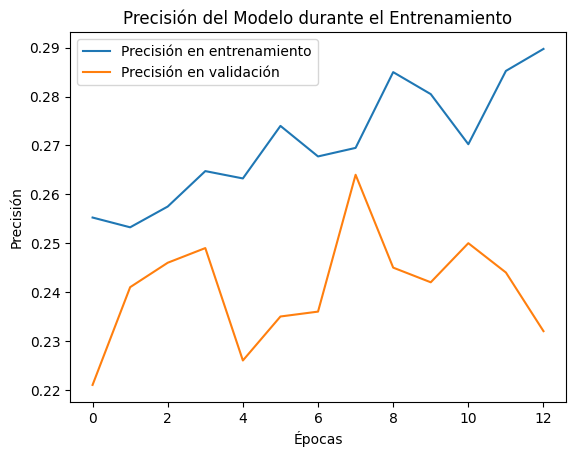

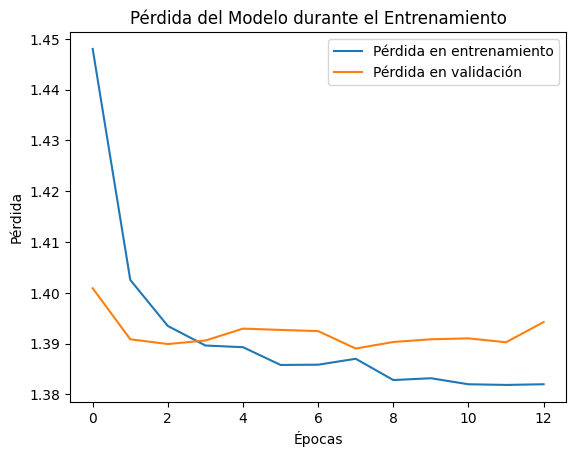

In [47]:
# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Codificación de la variable objetivo para clasificación multiclase
y_encoded = to_categorical(y, num_classes=4)

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Definir el modelo de red neuronal
model = Sequential([
    Dense(128, input_dim=X_train.shape[1]),  # Capa de entrada
    LeakyReLU(alpha=0.1),  # Función de activación Leaky ReLU
    Dropout(0.5),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(32),
    Dense(4, activation='softmax')  # Capa de salida con 4 neuronas (una para cada clase)
])

#! Cambiar el optimizador a RMSprop o Adam
optimizer = RMSprop(learning_rate=0.001)  # Puedes experimentar con el learning rate

# Compilar el modelo
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Definir EarlyStopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en el conjunto de prueba: {accuracy * 100:.2f}%")

# Graficar el desempeño del modelo durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión del Modelo durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida del Modelo durante el Entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()



In [ ]:
diccionario = {}
# Datos de entrada
for columna in columnas:
    value = float(input(f"Ingrese el valor para la columna '{columna}': "))
    diccionario[columna] = [value]


In [ ]:
# Hacer la predicción con nuevos datos
input_data = pd.DataFrame(diccionario)

# Normalizar los datos de entrada
input_data_scaled = scaler.transform(input_data)

# Hacer la predicción
prediccion = model.predict(input_data_scaled)
tipo_sostenimiento_predicho = np.argmax(prediccion, axis=1)

print(f"El tipo de sostenimiento predicho es: {tipo_sostenimiento_predicho[0]}")